## Assignment #4: Survey Data
## Marcus Miles

### Ban 7750-70: Financial Analytics
### Date: August 3, 2019

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

survey = pd.read_excel(r'C:\Users\DaBeast2\Survey_clean.xlsx')

survey.columns = survey.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

#splits id.o column into two columns
new = survey['id.o'].str.partition('C')
new[3] = new[1] + new[2]
new_df = pd.DataFrame(data = new, columns = (0,3))

new_df = new_df.rename(columns = {0:'desk',3:'trader_id'})

#insert new variables into trade dataframe
survey.insert(0,'desk', new_df['desk'])
survey.insert(1,'trader_id', new_df['trader_id'])
#trade = trade.drop('id.o', axis = 1)
survey.rename(columns = {'unnamed:_1':'gender','unnamed:_2':'buy_strat' },inplace = True)
survey.head(5)

,desk,trader_id,id.o,gender,buy_strat,q4,q5,q1,q2,q3,...,q22,q23,q24,q26,q27,q45,q28,q47,q29,q30
0,NaN,NaN,NaN,Gender,"Based on the INFORMATION provided, the best st...",I traded based on price movements indicated on...,I was not concerned about price movements indi...,I traded without considering the information p...,I traded using ALL of the information provided...,I traded using SOME of the information provide...,...,I believe that technological tools are more im...,I believe that information and technological t...,I would have traded differently if the informa...,This experience has made me more interested in...,I believe that I could have earned more profit...,I believe that I could have earned more profit...,I believe that I could have earned more profit...,I believe that I could have earned more profit...,I could have earned more profits if I knew wha...,I have had prior experience in live trading st...
1,S6,C14a1,S6C14a1,F,BUY FIRST AND THEN SELL LATER to make profit (...,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Neither Agree nor Disagree,...,Neither Agree nor Disagree,Strongly Agree,Neither Agree nor Disagree,Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree,Yes
2,S6,C12B1,S6C12B1,F,SELL FIRST AND THEN BUY LATER to make profit (...,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Agree,...,Neither Agree nor Disagree,Strongly Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree,Agree,Agree,Strongly Agree,No
3,S6,C1514,S6C1514,M,SELL FIRST AND THEN BUY LATER to make profit (...,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,...,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Strongly Agree,No
4,S6,C1414,S6C1414,M,SELL FIRST AND THEN BUY LATER to make profit (...,Agree,Disagree,Strongly Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,...,Strongly Disagree,Disagree,Neither Agree nor Disagree,Strongly Agree,Strongly Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,No


In [134]:
headers = survey.loc[0]
survey = survey.drop(0)

The following code is used to change the questionnaire answers into numeric categories. I tried to figure out a for loop to make the change
for all of the question columns but I didn't succeed at it and it was taking me a long time to figure out. Hence why you see the same line 
of code multiple times. 

In [122]:
#Mapping the ordinal data into the dataframe
survey['gender'] = survey['gender'].astype('category')
survey['q30'] = survey.q30.map({"No":0,'Yes':1})
survey['q1'] = survey.q1.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q2'] = survey.q2.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q3'] = survey.q3.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q4'] = survey.q4.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q5'] = survey.q5.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q6'] = survey.q6.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q7'] = survey.q7.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q8'] = survey.q8.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q9'] = survey.q9.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q10'] = survey.q10.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q11'] = survey.q11.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q12'] = survey.q12.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q13'] = survey.q13.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q14'] = survey.q14.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q15'] = survey.q15.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q16'] = survey.q16.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q17'] = survey.q17.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q18'] = survey.q18.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q19'] = survey.q19.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q20'] = survey.q20.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q21'] = survey.q21.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q22'] = survey.q22.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q23'] = survey.q23.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q24'] = survey.q24.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q26'] = survey.q26.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q27'] = survey.q27.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q28'] = survey.q28.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q29'] = survey.q29.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q45'] = survey.q45.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})
survey['q47'] = survey.q47.map({'Strongly Agree':1,'Agree':2,'Neither Agree nor Disagree':3,'Disagree':4,"Strongly Disagree":5})

In [82]:
print(survey.isnull().sum())
#survey.columns

desk         0
trader_id    0
id.o         0
gender       0
buy_strat    0
q4           0
q5           0
q1           0
q2           0
q3           0
q6           0
q7           0
q8           0
q9           0
q10          0
q11          0
q12          0
q13          0
q14          0
q15          0
q16          0
q17          0
q18          0
q19          0
q20          0
q21          0
q22          0
q23          0
q24          0
q26          0
q27          0
q45          0
q28          0
q47          0
q29          0
q30          0
dtype: int64


In [136]:
#survey.replace(('Strongly Agree','Agree','Neither Agree nor Disagree','Disagree','Strongly Disagree'),(1,2,3,4,5,),inplace=True)
survey.head(5)

,desk,trader_id,id.o,gender,buy_strat,q4,q5,q1,q2,q3,...,q22,q23,q24,q26,q27,q45,q28,q47,q29,q30
1,S6,C14a1,S6C14a1,F,BUY FIRST AND THEN SELL LATER to make profit (...,2,5,5,1,3,...,3,1,3,2,3,3,3,3,2,Yes
2,S6,C12B1,S6C12B1,F,SELL FIRST AND THEN BUY LATER to make profit (...,5,1,1,5,2,...,3,1,3,3,3,2,2,2,1,No
3,S6,C1514,S6C1514,M,SELL FIRST AND THEN BUY LATER to make profit (...,1,5,5,1,4,...,4,2,1,1,2,3,3,3,1,No
4,S6,C1414,S6C1414,M,SELL FIRST AND THEN BUY LATER to make profit (...,2,4,1,3,3,...,5,4,3,1,1,3,3,3,3,No
5,S6,C14b1,S6C14b1,M,BUY FIRST AND THEN SELL LATER to make profit (...,1,5,5,3,1,...,3,4,1,1,1,1,1,1,4,No


In [84]:
len(survey['desk'].unique().tolist())

12

In [86]:
headers.values

array([nan, nan, nan, 'Gender',
       'Based on the INFORMATION provided, the best strategy is to:',
       'I traded based on price movements indicated on the TraderEx screen',
       'I was not concerned about price movements indicated on the TraderEx screen',
       'I traded without considering the information pieces provided to me',
       'I traded using ALL of the information provided to me at each stage',
       'I traded using SOME of the information provided to me at each stage',
       'I did my best to win the maximum possible reward of $ 50.00',
       'I did my best to win at least one of the cash rewards of $ 5 or $ 10 but did not focus on $ 50',
       'I did not want the cash rewards at all',
       'I believe that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information',
       'I believe that I can improve on my net profits if I had more technological tools for analysis even if I did not hav

I focused on the following 5 survey questions within my analysis:

Q12: 'The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions'
Q13: 'Quantity of information would impact my trading decisions (More or less information would have made a difference).'
Q14: 'The medium (news /blog /video/ tool based) of information impacted my trading decisions'
Q15: 'I believe that more stock specific information could have helped me to increase my net profits'
Q16: 'I would have invested 10 cents of my own money for more information for a better attempt to win the 50.00
Q17: 'I would have invested 10 cents of my own money for better tech tools for a stronger attempt to win the 50.00'

The answer mapping is as follows:
Stongly Agree = 1
Agree = 2
Neither Agree nor Disagree = 3
Disagree = 4
Strongly Disagree = 5

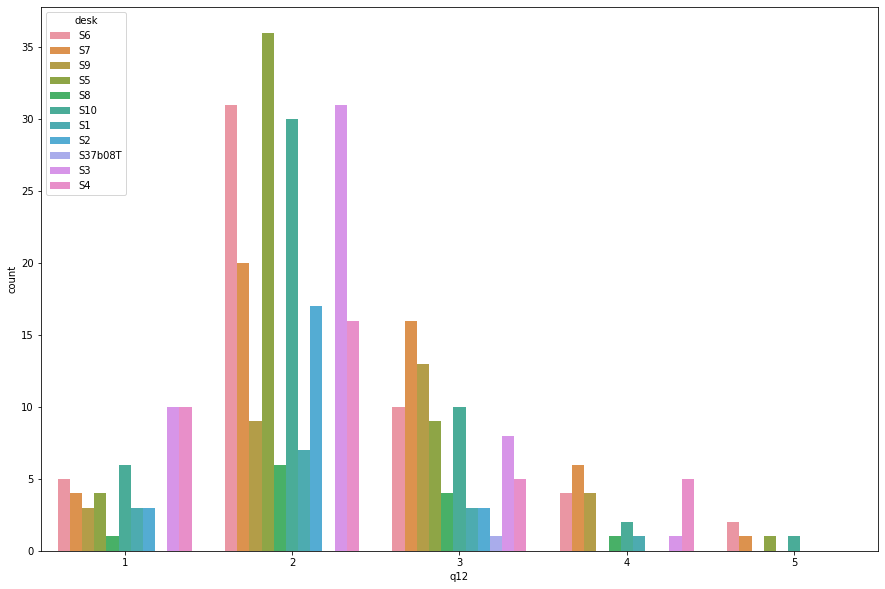

In [130]:
plt.figure(figsize=(15,10))
sns.countplot(x='q12', data= survey, hue='desk')

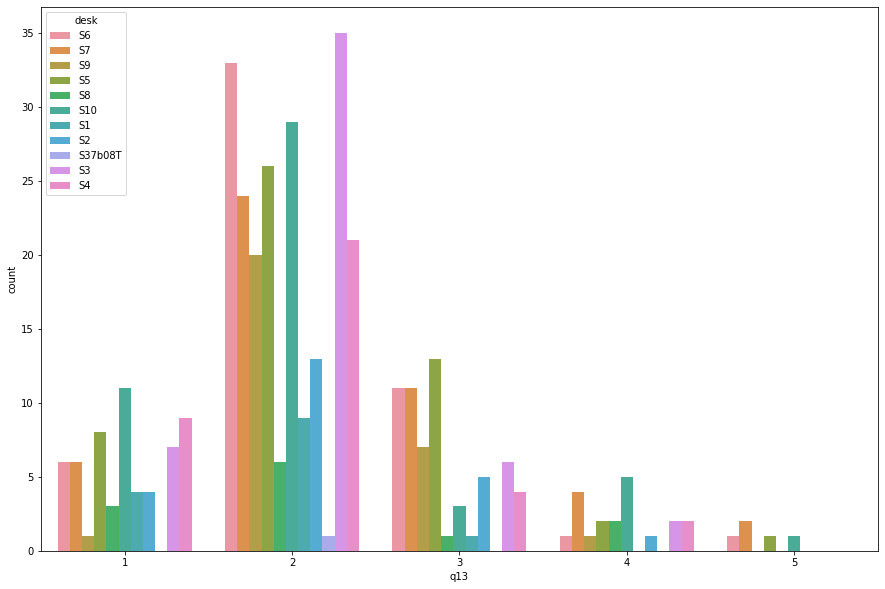

In [124]:
plt.figure(figsize=(15,10))
sns.countplot(x='q13', data= survey, hue='desk')

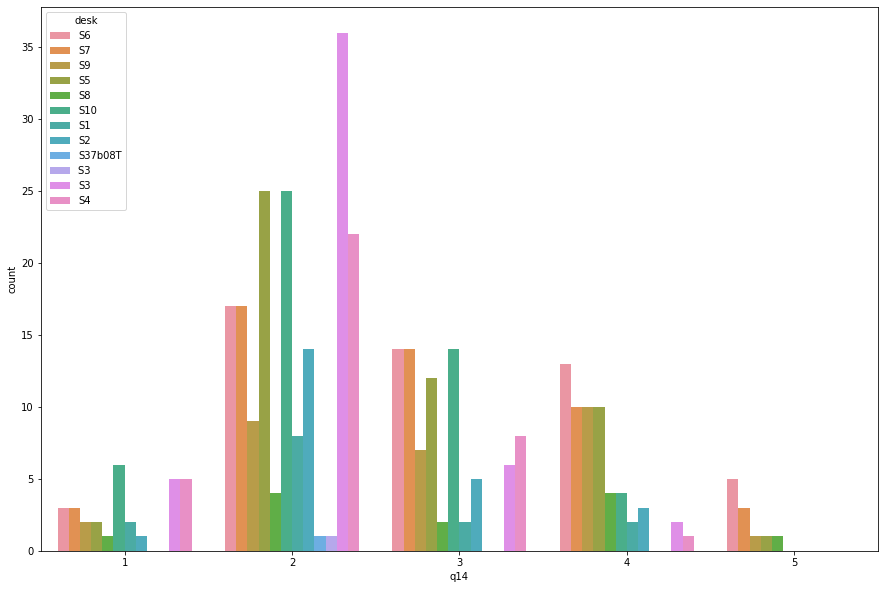

In [118]:
plt.figure(figsize=(15,10))
sns.countplot(x='q14', data= survey, hue='desk')

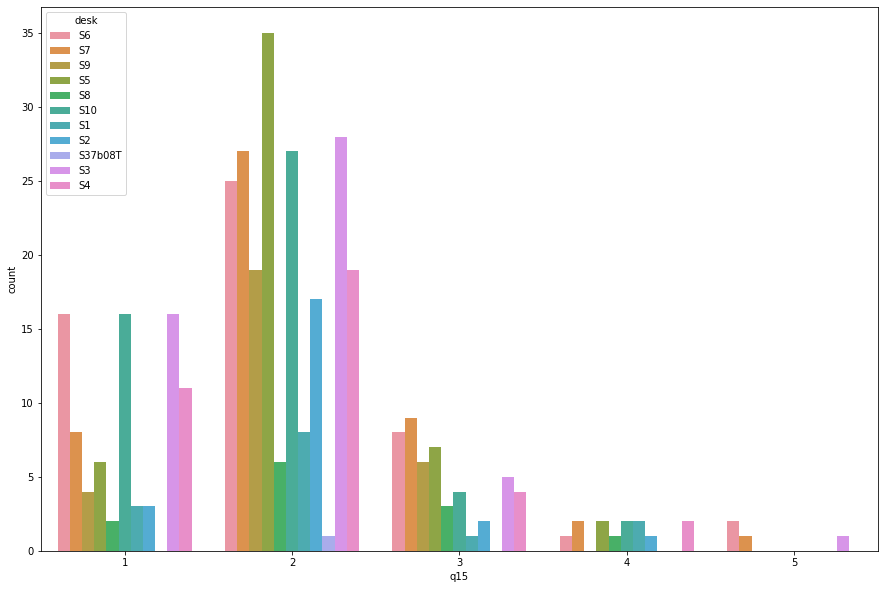

In [131]:
plt.figure(figsize=(15,10))
sns.countplot(x='q15', data= survey, hue='desk')

Based on the information determined from the graphs, most of the traders from group S5 and S3 believed that the more information that they had available to them would have helped them 
to make better trading decisions. The additional information would have been beneficial to the traders

-----------------------------------

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(survey.gender, survey.q12,test_size = 0.20, random_state=0)
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

ValueError: could not convert string to float: 'F'

I tried to do a KNN classifier but was unsuccessful.